In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [5]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

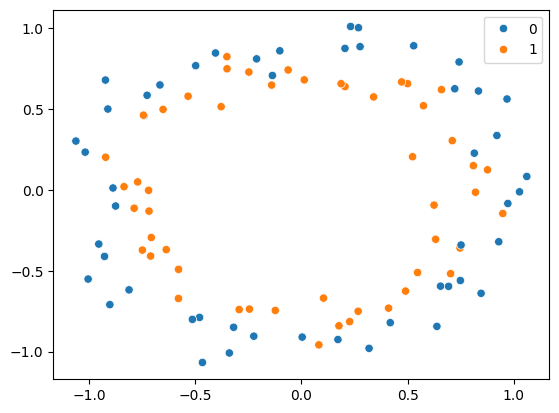

In [6]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [8]:
X_train.shape

(80, 2)

### Without early stopping

In [9]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(256,activation= 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [10]:
model.compile(loss= 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs = 500, validation_data=(X_test, y_test),verbose = 0)

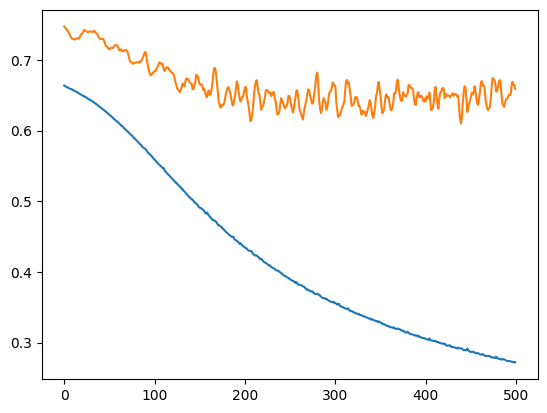

In [13]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


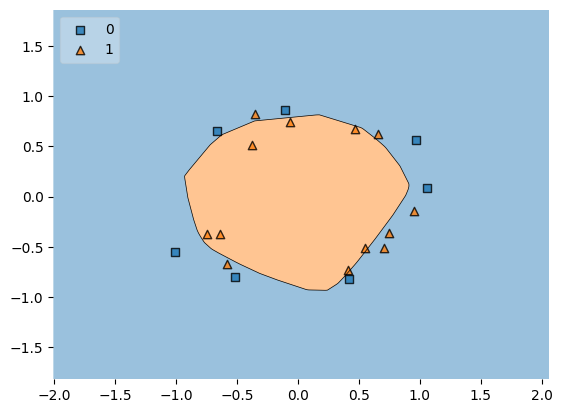

In [14]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

### with early stopping

In [15]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(256,activation= 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping  #we need to import this
# we need to create an early stooping object and pass it in callbacks during training
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 722ms/step - accuracy: 0.5000 - loss: 0.6906 - val_accuracy: 0.4000 - val_loss: 0.7018
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.5500 - loss: 0.6875 - val_accuracy: 0.3500 - val_loss: 0.7048
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5375 - loss: 0.6863 - val_accuracy: 0.3500 - val_loss: 0.7081
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5375 - loss: 0.6840 - val_accuracy: 0.3500 - val_loss: 0.7098
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5375 - loss: 0.6828 - val_accuracy: 0.3500 - val_loss: 0.7120
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5375 - loss: 0.6820 - val_accuracy: 0.3500 - val_loss: 0.7150
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5375 - loss: 0.6805 - val_accuracy: 0.3500 - val_loss: 0.7171
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.5375 - loss: 0.6799 - val_accuracy: 0.3500

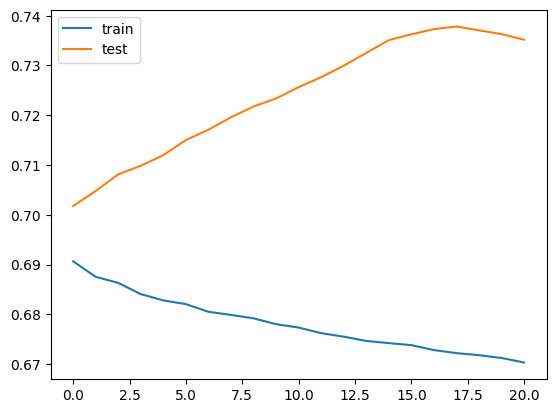

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


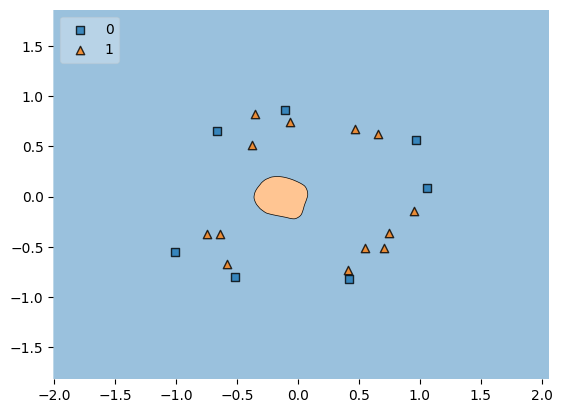

In [20]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()